In [1]:
%reset -f

In [2]:
# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns

# GOAL

### Fetch data

In [3]:
data = pd.read_csv("/kaggle/input/life-expectancy-who/Life Expectancy Data.csv")

In [4]:
data.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


> Lets checks the features (variables) their type and their status

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

 - We observe that there are a lot of missing-values even for Life Expectancy that is the target variable. 
 - Some variables seem not to be of correct type! For example Year would be better be of 'string' type. 
 - Features names also contain some blank spaces at the begining or at the end of the names.
 - I am also going to modify the name of some features because some statistical methods don't accept spaces in feature names
 - Also we dont have data smoking, exercise and population denisty.

# 1) Data Cleaning

> As I mentioned earlier, I am also going to modify the name of some features because some statistical methods don't accept spaces or blanks in feature names.

In [6]:
#changing the name of some feautres
# Original and new column names mapping
column_mapping = {
    'Life expectancy ': 'Life_expectancy',
    'Adult Mortality': 'Adult_Mortality_rate',
    'infant deaths': 'Infant_deaths_cases',
    'percentage expenditure': 'Percent_health_expenditure_GDP',
    'Hepatitis B': 'Hepatitis_coverage',
    'Measles ': 'Measles_cases',
    ' BMI ': 'BMI',
    'under-five deaths ': 'Under_5_deaths_cases',
    'Polio': 'Polio_coverage',
    'Total expenditure': 'Total_health_expenditure_gov',
    'Diphtheria ': 'Diphtheria_coverage',
    ' HIV/AIDS': 'HIV_death_cases',
    ' thinness  1-19 years': 'Thinness_1_19_years',
    ' thinness 5-9 years': 'Thinness_5_9_years',
    'Income composition of resources': 'Income_composition_resources',
    'Schooling': 'Schooling_years'
}

# To rename the columns of your DataFrame
data = data.rename(columns=column_mapping)

In [7]:
# set Year as a category
data["Year"] = data["Year"].astype("str")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         2938 non-null   object 
 1   Year                            2938 non-null   object 
 2   Status                          2938 non-null   object 
 3   Life_expectancy                 2928 non-null   float64
 4   Adult_Mortality_rate            2928 non-null   float64
 5   Infant_deaths_cases             2938 non-null   int64  
 6   Alcohol                         2744 non-null   float64
 7   Percent_health_expenditure_GDP  2938 non-null   float64
 8   Hepatitis_coverage              2385 non-null   float64
 9   Measles_cases                   2938 non-null   int64  
 10  BMI                             2904 non-null   float64
 11  Under_5_deaths_cases            2938 non-null   int64  
 12  Polio_coverage                  29

> Let's look at some statistics of the data and see if they are meaningful

In [9]:
data.describe()

,Life_expectancy,Adult_Mortality_rate,Infant_deaths_cases,Alcohol,Percent_health_expenditure_GDP,Hepatitis_coverage,Measles_cases,BMI,Under_5_deaths_cases,Polio_coverage,Total_health_expenditure_gov,Diphtheria_coverage,HIV_death_cases,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_resources,Schooling_years
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


> Here are some initial takeaways from the data:
- Minimum "Population" is 34 which doesnt seem to be correct (we will get back to population at the end)
- 'Under_5_deaths_cases' which is defined as "number of under 5 deaths per 1000 population" has a maximum value of 2500 which doesnt make sense!
- 'Measles_cases' is defined as "number of reported cases per 1000 population". But it has a maximum value of 212183!
- 'Infant_deaths_cases' is defined as "Number of Infant Deaths per 1000 population" but has a maximum value of 1800!

 > Lets first deal with missing values:

### Dealing with missing values

There are different approches to deal with missing values. 
Here, for any missing value I have decided to use the averge value for that country, if possible! The reason for this approach is that, many features like population, life_expectancy or several types of maladies change very slowing in span of 10-15 years (unless if there is a natural disaster, epidemy or large escale wars,...). So it is reasonable enough to impute the missing values with the country's average.

However, for some countries, there are features with no value at all! For these cases, I have used the average of the feature values of the 'countries' in the 'same geographical regions'. To get the corresponding geographical regions, I have used an AI api to map each country with a geographical area. In total 14 different geographical regions have been identified and coutrnies have been grouped in these regions: ['North America', 'Latin America', 'Western Europe','Eastern Europe', 'Asia', 'Middle East', 'Oceania', 'North Africa','Central Africa', 'West Africa', 'East Africa', 'Southern Africa','Scandinavia', 'Southern Europe']

In [10]:
#Since maybe some users dont have access (tokens) to use APIs for common AI models, I have already prepared a list of country / region.
# list of countries vs geographical regions
data_region = pd.read_csv("/kaggle/input/lifeexp-region-popdensity/country_region_list.csv", index_col = 0)

In [11]:
data_region.sample(6)

,Country,Region
138,Democratic Republic of the Congo,Central Africa
16,Barbados,North America
155,Sierra Leone,West Africa
96,Viet Nam,Asia
68,Azerbaijan,Asia
153,Nigeria,West Africa


In [12]:
# Merging the data with Regional data (df)
merged_data = data.merge(data_region, on='Country', how='left')

In [13]:
data = merged_data.copy()

Now, we calculate the average value for each feature for each the geographical region.

In [14]:
#calculating average values for each features for each region
data_region_avg = data.drop(["Country", "Status", "Year"], axis=1).groupby('Region').mean()

In [15]:
data_region_avg

,Life_expectancy,Adult_Mortality_rate,Infant_deaths_cases,Alcohol,Percent_health_expenditure_GDP,Hepatitis_coverage,Measles_cases,BMI,Under_5_deaths_cases,Polio_coverage,Total_health_expenditure_gov,Diphtheria_coverage,HIV_death_cases,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_resources,Schooling_years
Region,,,,,,,,,,,,,,,,,,,
Asia,69.829297,152.306641,84.792969,2.406950,325.803478,82.446188,5754.199219,25.238086,109.414062,84.886275,4.705193,85.847059,0.180469,4398.266418,3.244025e+07,8.149609,8.557227,0.605052,11.296458
Central Africa,55.029464,277.660714,51.955357,3.514381,133.056354,51.807018,8422.151786,20.066071,75.857143,49.839286,3.684000,45.750000,5.639286,2942.106116,3.532400e+06,7.286607,7.170536,0.473500,8.676042
East Africa,57.422059,301.283088,45.661765,2.593375,60.093276,77.339901,3512.367647,18.144141,69.632353,72.080460,5.611404,70.900383,6.301103,886.660065,9.095836e+06,7.011328,6.846484,0.401379,8.452500
Eastern Europe,73.825312,129.681250,1.578125,9.127200,437.149454,88.031373,548.462500,52.157187,1.856250,93.401274,6.890399,92.073248,0.130000,5934.464893,7.523115e+06,2.265625,2.340937,0.731861,14.135069
Latin America,72.971875,139.119792,11.489583,5.782111,377.524082,82.988372,25.140625,47.804167,13.437500,84.640625,6.490833,86.156250,0.267187,4334.072499,1.866346e+07,2.154688,2.064583,0.689406,13.406771
Middle East,74.107500,93.183333,9.850000,1.525422,754.777532,87.195833,1069.275000,52.115833,12.008333,87.312500,4.942928,86.462500,0.100000,13937.758245,9.516851e+06,5.538333,5.434583,0.719587,12.663333
North Africa,70.990625,128.791667,28.000000,0.648778,163.948265,89.241379,1549.104167,49.943750,36.468750,91.968750,5.144778,92.052083,0.125000,2625.209632,1.589062e+07,5.536250,5.426250,0.633740,11.686458
North America,73.778869,126.119048,5.637982,6.103165,537.846661,83.089701,17.415430,44.965282,6.893175,85.468843,6.766076,87.599407,0.466172,5914.418713,5.204519e+06,2.817804,2.777745,0.656941,12.429907
Oceania,70.664205,137.801136,1.016393,2.985698,844.041054,74.022346,229.874317,52.714754,1.322404,79.322404,6.579535,76.295082,0.269399,6134.660591,1.184190e+06,1.469945,1.416940,0.609017,12.581768


### A function to impute missing values

> The below function, fills the missing values with the country's average for that feature. If the corresponding feature is NaN for the country, it will ueses the geographical region's average.

In [16]:
def fill_values(X, data_region_avg):
    # Iterate over each country
    for country in X['Country'].unique():
        country_data = X[X['Country'] == country]
        region = country_data['Region'].iloc[0]  # Assuming there's only one region per country

        # Iterate over each feature/column in the DataFrame
        for feature in X.columns:
            if country_data[feature].isna().any():
                missing_rows = country_data[feature].isna()
                missing_index = missing_rows[missing_rows].index
                
                if country_data[feature].notna().any(): #if there is data for country
                    mean_value = country_data[feature].mean()
                    X.loc[missing_index, feature] = mean_value
                else:
                    if region in data_region_avg.index: #otherwise use regional data
                        regional_avg = data_region_avg.loc[region, feature]
                        X.loc[missing_index, feature] = regional_avg
    return X

In [17]:
# Fill missing values
data = fill_values(data, data_region_avg)

> So we have a dataset with suitable feature names and filled missing values

#  2) DATA EXPLORATION

In [18]:
numeric_attribs = merged_data.drop(['Country', 'Year', 'Status', 'Region'], axis =1).columns

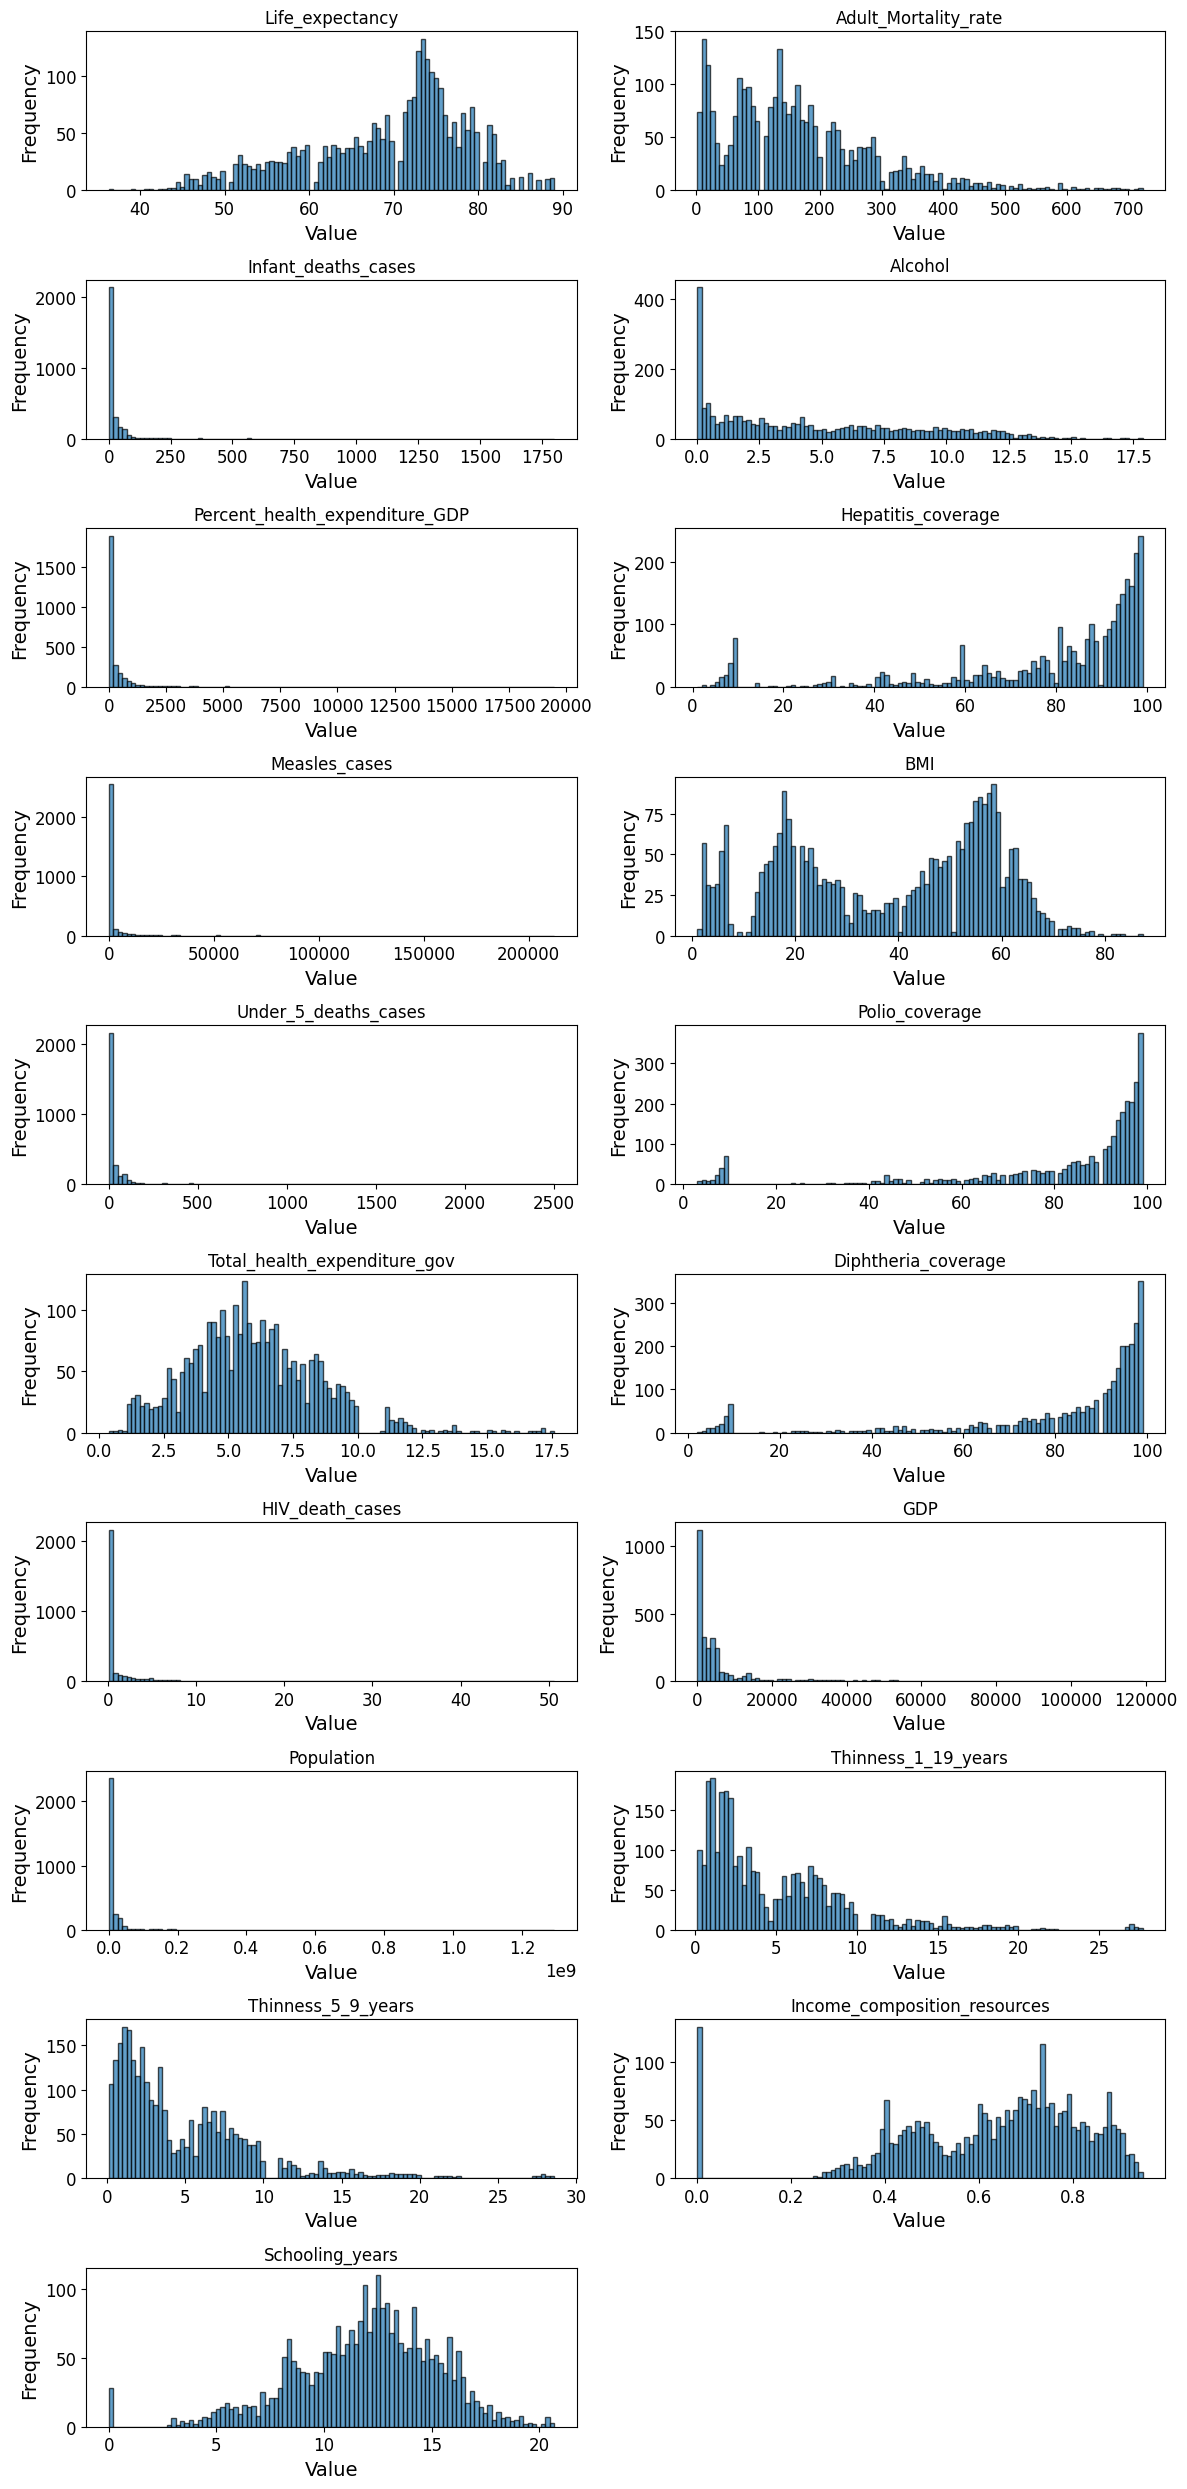

In [19]:
# List of features to plot
features_to_plot = numeric_attribs 

# Number of rows and columns for subplots
n_rows = 10
n_cols = 2

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 25))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for ax, feature in zip(axes, features_to_plot):
    ax.hist(data[feature], bins=100, alpha=0.7, edgecolor='black')
    ax.set_title(f'{feature}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Remove any empty subplots if the number of features is less than the number of subplots
for ax in axes[len(features_to_plot):]:
    ax.remove()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

> Let's have a closer look at some of these features for example Population

### Life Expectancy

In [20]:
data["Life_expectancy"].describe()

count    2938.000000
mean       69.238159
std         9.513517
min        36.300000
25%        63.200000
50%        72.050000
75%        75.675000
max        89.000000
Name: Life_expectancy, dtype: float64

While the average life expectancy of the countries with lowest life_expectancy is around 45 to 49 years, the minimum value of life expectancy is 36 which seems to be an outlier. Let's check it out:

In [21]:
data[["Country","Life_expectancy"]][data["Life_expectancy"]<63].groupby("Country").mean().sort_values(by= "Life_expectancy").head(5)

,Life_expectancy
Country,
Sierra Leone,46.112500
Central African Republic,48.512500
Lesotho,48.781250
Angola,49.018750
Zimbabwe,49.386667


In [22]:
data[["Country","Life_expectancy"]][data["Life_expectancy"]<63].groupby("Country").min().sort_values(by= "Life_expectancy").head(5)

,Life_expectancy
Country,
Haiti,36.3
Sierra Leone,39.0
Malawi,43.1
Zambia,43.8
Zimbabwe,44.3


 It seems that there is a data entry problem for one of Haiti's Life_expectancy's year. A life expectancy of 36y at 2010 while preceeding year and the future year are 62.5y seems a data entry problem. we can correct it

In [23]:
data[["Country","Year","Life_expectancy"]][data["Country"] == "Haiti"]

,Country,Year,Life_expectancy
1122,Haiti,2015,63.5
1123,Haiti,2014,63.1
1124,Haiti,2013,62.7
1125,Haiti,2012,62.3
1126,Haiti,2011,62.3
1127,Haiti,2010,36.3
1128,Haiti,2009,62.5
1129,Haiti,2008,62.1
1130,Haiti,2007,61.8
1131,Haiti,2006,61.1


In [24]:
data.loc[1127, 'Life_expectancy'] = 63.3

The life expectancy of 39 y for Sierra Leone seems to be consistent with other years for this country. So we dont change it

In [25]:
data[["Country","Year","Life_expectancy"]][data["Country"] == "Sierra Leone"]

,Country,Year,Life_expectancy
2297,Sierra Leone,2015,51.0
2298,Sierra Leone,2014,48.1
2299,Sierra Leone,2013,54.0
2300,Sierra Leone,2012,49.7
2301,Sierra Leone,2011,48.9
2302,Sierra Leone,2010,48.1
2303,Sierra Leone,2009,47.1
2304,Sierra Leone,2008,46.2
2305,Sierra Leone,2007,45.3
2306,Sierra Leone,2006,44.3


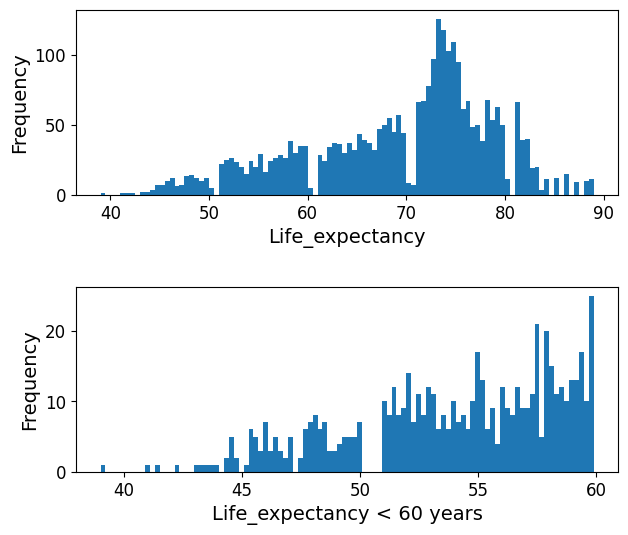

In [26]:
fig, ax = plt.subplots(2,1, figsize=(7, 6))
ax[0].hist(data["Life_expectancy"], bins = 100)
ax[0].set_xlabel("Life_expectancy")
ax[0].set_ylabel("Frequency")
ax[1].hist(data["Life_expectancy"][data["Life_expectancy"]<60], bins = 100)
ax[1].set_xlabel("Life_expectancy < 60 years")
ax[1].set_ylabel("Frequency")
# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5)  # Increase this value for more space
plt.show()

### Population

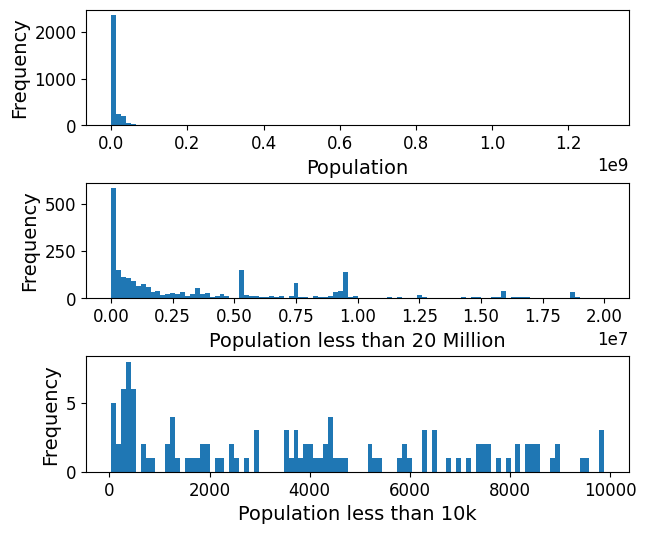

In [27]:
fig, ax = plt.subplots(3,1, figsize=(7, 6))
ax[0].hist(data["Population"], bins = 100)
ax[0].set_xlabel("Population")
ax[0].set_ylabel("Frequency")
ax[1].hist(data["Population"][data["Population"]<20000000], bins = 100)
ax[1].set_xlabel("Population less than 20 Million")
ax[1].set_ylabel("Frequency")
ax[2].hist(data["Population"][data["Population"]<10000], bins = 100)
ax[2].set_xlabel("Population less than 10k")
ax[2].set_ylabel("Frequency")
# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5)  # Increase this value for more space
plt.show()

> We observe that Population data is highly skewed, but that's not all! With it a bit of diggng, we find out that population data are not of good quality! For exmaple, we can see that the minimum population for a country is only 34 which is wrong (the least populated country is Vatican with a population of at least 1000)

In [28]:
data["Population"].describe()['min']

34.0

> But there is more! As another example, we can check the population of Afghanistan and observe the discrepancy in the data

In [29]:
data[["Year","Population"]][data["Country"]=="Afghanistan"]

,Year,Population
0,2015,33736494.0
1,2014,327582.0
2,2013,31731688.0
3,2012,3696958.0
4,2011,2978599.0
5,2010,2883167.0
6,2009,284331.0
7,2008,2729431.0
8,2007,26616792.0
9,2006,2589345.0


The same problem has occured for Algeria, Thailand and many other countries.

> One might think that there if we take the maximum value of population for each country, we can fix them problem, but if we have a look the countries with max_population_value < 100k we see Israel, Sri Lanka and Iceland. So we can argue that the population data are wrong!

In [30]:
data_population_max = data[["Country","Population"]].groupby("Country").max()
data_population_max[data_population_max["Population"]<100000]

,Population
Country,
Georgia,44183.0
Israel,82157.0
Kiribati,96311.0
Maldives,49163.0
Palau,292.0
Seychelles,93419.0
Sri Lanka,19968.0
Tonga,99789.0
Tuvalu,1819.0


> It seems that population data is of very poor quality. Maybe it is bettter to exclude them from our analysis.

### Under_5_deaths_cases

'Under_5_deaths_cases' by definition is number of death per 1000 under 5yo child and the statistics in below and plots 
confirm that most of the data follow the rule

In [31]:
data["Under_5_deaths_cases"].describe()

count    2938.000000
mean       42.035739
std       160.445548
min         0.000000
25%         0.000000
50%         4.000000
75%        28.000000
max      2500.000000
Name: Under_5_deaths_cases, dtype: float64

> It seems that only India has some cases above 1000. We can replace them we maximum value of 1000

In [32]:
data[["Country", "Year","Under_5_deaths_cases"]][data["Under_5_deaths_cases"]>1000]

,Country,Year,Under_5_deaths_cases
1186,India,2015,1100
1187,India,2014,1200
1188,India,2013,1300
1189,India,2012,1400
1190,India,2011,1500
1191,India,2010,1600
1192,India,2009,1700
1193,India,2008,1800
1194,India,2007,1900
1195,India,2006,2000


### Measles_Cases

In [33]:
data["Measles_cases"].describe()

count      2938.000000
mean       2419.592240
std       11467.272489
min           0.000000
25%           0.000000
50%          17.000000
75%         360.250000
max      212183.000000
Name: Measles_cases, dtype: float64

In [34]:
data[["Country","Year","Measles_cases"]][data["Measles_cases"]>1000]

,Country,Year,Measles_cases
0,Afghanistan,2015,1154
3,Afghanistan,2012,2787
4,Afghanistan,2011,3013
5,Afghanistan,2010,1989
6,Afghanistan,2009,2861
...,...,...,...
2919,Zambia,2002,25036
2920,Zambia,2001,16997
2921,Zambia,2000,30930
2927,Zimbabwe,2010,9696


A lot of countries have Measles cases above 1000 which doesn't make sense!

### Percent_health_expenditure_GDP

Percent_health_expenditure_GDP can't be larger than 100! Unfortunately many countries have values over 100 or their value is 0.

In [35]:
data['Percent_health_expenditure_GDP'].describe()

count     2938.000000
mean       738.251295
std       1987.914858
min          0.000000
25%          4.685343
50%         64.912906
75%        441.534144
max      19479.911610
Name: Percent_health_expenditure_GDP, dtype: float64

In [36]:
len(data[["Year","Country",'Percent_health_expenditure_GDP']][data['Percent_health_expenditure_GDP']>=100]["Country"].unique())

130

In [37]:
data_NZ = data[["Year",'Percent_health_expenditure_GDP']][data['Country'] == 'Netherlands']
data_NZ[data_NZ["Percent_health_expenditure_GDP"]<100]

,Year,Percent_health_expenditure_GDP
1829,2015,0.000000
1835,2009,96.858588


# 3) DATA CLEANING / pt. II

#### Case of 'Under_5_deaths_cases'

Since this problem appears only for India and all of its values are > 1000 we replace their value with maximum value of 1000

In [38]:
data["Under_5_deaths_cases"] = np.where(data["Under_5_deaths_cases"] > 1000, 1000, data["Under_5_deaths_cases"])

#### Case of Measles_cases and Percent_health_expenditure_GDP

In these two cases, we will write a function to replace outlier values with Country average (excluding outliers) or Regional Averages

In [39]:
def outlier_replacement(X, feature, threshold):
    # Iterate over each country
    for country in X['Country'].unique():
        country_data = X[X['Country'] == country]
        region = country_data['Region'].iloc[0]  # There's only one region per country

        # Identify outliers
        outlier_index = country_data[feature][country_data[feature] > threshold].index
        non_outliers = country_data[feature][country_data[feature] <= threshold]

        if not non_outliers.empty:
            replacement_value = non_outliers.mean()
        else:
            regional_mean = X[(X[feature] < 1000) & (X["Region"] == region)][feature].mean()
            if regional_mean <= threshold:
                replacement_value = regional_mean
            else:
                replacement_value = threshold

        # Replace outliers
        X.loc[outlier_index, feature] = replacement_value

    return X

In [40]:
data = outlier_replacement(data, "Measles_cases", 1000)
data = outlier_replacement(data, 'Percent_health_expenditure_GDP', 1000)

/tmp/ipykernel_17/1443465888.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '546.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[outlier_index, feature] = replacement_value


#### Case of Population

The Population data are of low quality so we exclude them. Instead we will use Population density which is related to question 7

> One might ask why we didn't import population data from official sources or AI tools, the main reason is that we are more concerend about population density and not population itself.

#### Calculating Population Density

So we don't have population density. Our population data is not reliable and we don't have area (km2) data.
Instead, we can use AI tools and get population denisty of each country. 
I have already done this and prepared the reuslt in a new data frame.

In [41]:
df = pd.read_csv("/kaggle/input/lifeexp-region-popdensity/Population_Density.csv", index_col = [0])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     193 non-null    object 
 1   Population_Denisty_per_km2  193 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


In [43]:
data = pd.merge(data, df, on = "Country")

> Let's look at Density distribution

In [44]:
data["Population_Denisty_per_km2"].describe()

count     2938.000000
mean       164.762634
std        585.320682
min          1.800000
25%         24.600000
50%         66.900000
75%        134.000000
max      16271.500000
Name: Population_Denisty_per_km2, dtype: float64

There is huge difference between quantile 75% and max value. These outliers are few countries:

In [45]:
data[["Country","Population_Denisty_per_km2"]][data["Population_Denisty_per_km2"]>1000].groupby("Country").mean()

,Population_Denisty_per_km2
Country,
Bahrain,1050.5
Bangladesh,1023.4
Maldives,1196.7
Malta,1266.5
Monaco,16271.5
Singapore,6482.2


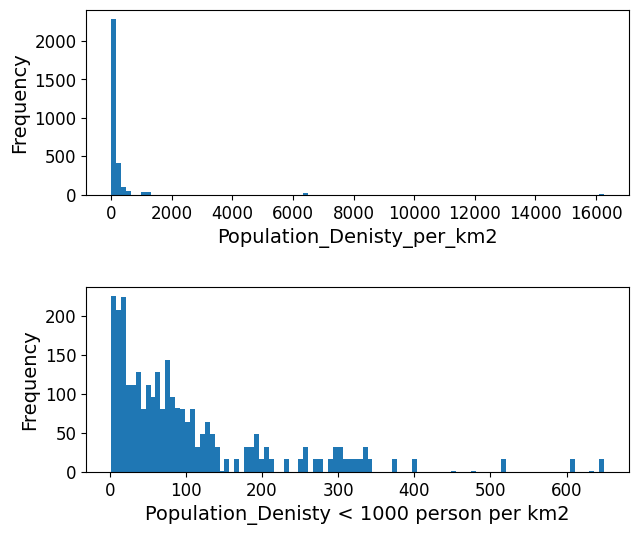

In [46]:
fig, ax = plt.subplots(2,1, figsize=(7, 6))
ax[0].hist(data["Population_Denisty_per_km2"], bins = 100)
ax[0].set_xlabel("Population_Denisty_per_km2")
ax[0].set_ylabel("Frequency")
ax[1].hist(data["Population_Denisty_per_km2"][data["Population_Denisty_per_km2"]<1000], bins = 100)
ax[1].set_xlabel("Population_Denisty < 1000 person per km2")
ax[1].set_ylabel("Frequency")
# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5)  # Increase this value for more space
plt.show()

- We can observe that population density is very skewded which makes sense, because there are some geographical regions on planet earth which are more populated than other.
- One solution is to convert 'population density' to a category feature and then apply an ANOVA test to see if there is any significant relationship between 'population density' and 'life_expectancy' or not?
- For this, we should calculate the number of bins. It is not a good approach to visualy choose an arbitrary number of bins because the data is very skewed. One method to find the optimum number of bins is using Doanes Formula which is suitable for highly skewed data and can calculates the optimum number of equally width bins.


#### Calculating bins for Density

In [47]:
#I have written a formula to calculate nuber of bins
from scipy.stats import skew
# we use Doanes formula which is suitable for skewed data.
# This formula gives the number of bins (of equal width)
def doanes_formula(data, col):
    # Number of data points
    n = len(data[col])
    
    # Calculate skewness
    g1 = skew(data[col])
    
    # Calculate the correction factor for skewness
    sigma_g1 = np.sqrt((6 * (n - 2)) / ((n + 1) * (n + 3)))
    
    # Calculate the number of bins using Doane's formula
    num_bins = int(np.ceil(1 + np.log2(n) + np.log2(1 + np.abs(g1) / sigma_g1)))
    
    return num_bins

In [48]:
# number of bins
number_bins = doanes_formula(data, "Population_Denisty_per_km2")
number_bins

21

So according to Doanes formula we have to create 21 bins of equal width for population. This makes sense because the data is highly skewed.

> Now I write another function and takes 'population denisty' and number of bins as input and encodes data as Ordinal numbers from 0 to 21. Each number corresponds to a certain bin.

In [49]:
from sklearn.preprocessing import KBinsDiscretizer

def num_encoder(X, n_bins,num_cat_attribs):
    # Sample data
    X = X[num_cat_attribs].to_numpy()

    # Create the discretizer
    kbd = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

    # Fit and transform the data
    X_binned = kbd.fit_transform(X)

    return X_binned

In [50]:
density_array = num_encoder(data, number_bins,["Population_Denisty_per_km2"])

In [51]:
data["encoded_density"] = pd.DataFrame(density_array)

Sicne the encoded ordinal numbers are of categorical nature with convert them to "string"

In [52]:
data["encoded_density"] = data["encoded_density"].astype("str")

> The population density we calculated here is a constant value over years (I dont know exactly from which year it comes).
But we assume that since are data are in range of 15 years and the population of countries do not change a lot in 15 years, assuming population_density constant over this period is a valid hypthesis.

> Lets group the life expectancy be population density encoded to see the average life_exp in each density group:

In [53]:
data[['Life_expectancy', 'encoded_density']].groupby("encoded_density").mean()

,Life_expectancy
encoded_density,
0.0,69.040591
1.0,75.231250
20.0,81.341346
8.0,81.475000


Here, we can observe that although we created 21 bins, there are only 4 bins present in data, this is because we encoded the density data Ordinaly and it means that there is a huge difference for example between 2nd bin and 9th bin and then we jump into 21st bin.
What is important is that we set the pop_density as a string not an int

> We can also see that the life expectancy of the highly densed countries seem to be higher than low density countries.

# 4) Inferential Analysis

> In order to investigate the impact of each feature on Life Expectancy we should run a ANOVA test. When dealing with numerical variables +categorical feautres we perform a Regression and then test the impact of each variable on the target by a ANOVA test.

## Correlation test

Let's first have a look at correlation of 'life expectancy' with other feautres

In [54]:
# Updating numerical attributes while dropping population because it is very of low quality
# I am not using encoded_denisty at this stage
numeric_attribs = data.drop(['Country', 'Year', 'Status', 'Region', 'encoded_density', 'Population'], axis=1).columns

In [55]:
data_numeric = data[numeric_attribs]

In [56]:
cor = data_numeric.corr()["Life_expectancy"]
cor

Life_expectancy                   1.000000
Adult_Mortality_rate             -0.693898
Infant_deaths_cases              -0.197221
Alcohol                           0.407891
Percent_health_expenditure_GDP    0.376552
Hepatitis_coverage                0.288108
Measles_cases                    -0.249983
BMI                               0.565611
Under_5_deaths_cases             -0.298123
Polio_coverage                    0.470555
Total_health_expenditure_gov      0.228534
Diphtheria_coverage               0.483786
HIV_death_cases                  -0.557635
GDP                               0.455015
Thinness_1_19_years              -0.478732
Thinness_5_9_years               -0.472662
Income_composition_resources      0.728136
Schooling_years                   0.750339
Population_Denisty_per_km2        0.156110
Name: Life_expectancy, dtype: float64

In [57]:
#the most correlated
cor[np.abs(cor)>0.5]

Life_expectancy                 1.000000
Adult_Mortality_rate           -0.693898
BMI                             0.565611
HIV_death_cases                -0.557635
Income_composition_resources    0.728136
Schooling_years                 0.750339
Name: Life_expectancy, dtype: float64

In [58]:
#the least correlated
cor[np.abs(cor)<0.3]

Infant_deaths_cases            -0.197221
Hepatitis_coverage              0.288108
Measles_cases                  -0.249983
Under_5_deaths_cases           -0.298123
Total_health_expenditure_gov    0.228534
Population_Denisty_per_km2      0.156110
Name: Life_expectancy, dtype: float64

> Although correlation doesn't mean causation but still it gives some insgihts of how target variable changes with feautres or at least the direction of data variances

> Before running the regression model let's check for multicollinearity in the data. Multicollinearity occurs when independent variables in a regression model are highly correlated with each other, which can affect the stability and interpretation of the model coefficients.

## Multicollinearity Test

> To evaluate the multicollinearity  we perform the Variance Inflation Factor (VIF) test. VIF quantifies how much the variance of an estimated regression coefficient increases due to multicollinearity.
A VIF of 1 indicates no correlation between the variable and any other variables.
Generally, a higher VIF indicates higher multicollinearity.

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF Test
vif = add_constant(data_numeric)
pd.Series([variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])], index=vif.columns)

const                             240.721185
Life_expectancy                     5.881824
Adult_Mortality_rate                2.073373
Infant_deaths_cases                 8.098036
Alcohol                             1.670769
Percent_health_expenditure_GDP      1.263510
Hepatitis_coverage                  1.654273
Measles_cases                       1.237853
BMI                                 1.826294
Under_5_deaths_cases                8.462861
Polio_coverage                      2.021287
Total_health_expenditure_gov        1.184508
Diphtheria_coverage                 2.382427
HIV_death_cases                     1.845936
GDP                                 1.415056
Thinness_1_19_years                 8.803755
Thinness_5_9_years                  8.886003
Income_composition_resources        3.293305
Schooling_years                     4.114857
Population_Denisty_per_km2          1.088687
dtype: float64

> As we can see the features : 'Infant_deaths_cases' , 'Under_5_deaths_cases', 'Thinness_1_19_years', 'Thinness_5_9_years' are highly correlated with outher feautres. 
Let's explore them

In [60]:
data_numeric.corr()["Thinness_1_19_years"][np.abs(data_numeric.corr()["Thinness_1_19_years"])>0.7]

Thinness_1_19_years    1.000000
Thinness_5_9_years     0.939205
Name: Thinness_1_19_years, dtype: float64

In [61]:
data_numeric.corr()["Thinness_5_9_years"][np.abs(data_numeric.corr()["Thinness_5_9_years"])>0.7]

Thinness_1_19_years    0.939205
Thinness_5_9_years     1.000000
Name: Thinness_5_9_years, dtype: float64

In [62]:
data_numeric.corr()["Under_5_deaths_cases"][np.abs(data_numeric.corr()["Under_5_deaths_cases"])>0.7]

Infant_deaths_cases     0.924188
Under_5_deaths_cases    1.000000
Name: Under_5_deaths_cases, dtype: float64

In [63]:
data_numeric.corr()["Infant_deaths_cases"][np.abs(data_numeric.corr()["Infant_deaths_cases"])>0.7]

Infant_deaths_cases     1.000000
Under_5_deaths_cases    0.924188
Name: Infant_deaths_cases, dtype: float64

> OK let's delete "Thinness_5_9_years" and "Under_5_deaths_cases" and check again for multicolinarity

In [64]:
data_numeric_updated = data_numeric.drop(["Thinness_5_9_years", "Under_5_deaths_cases"], axis =1)

In [65]:
#we double check the updates dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF Test
vif = add_constant(data_numeric_updated)
pd.Series([variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])], index=vif.columns)

const                             228.422022
Life_expectancy                     5.763328
Adult_Mortality_rate                2.065447
Infant_deaths_cases                 1.368755
Alcohol                             1.650157
Percent_health_expenditure_GDP      1.263422
Hepatitis_coverage                  1.652055
Measles_cases                       1.148894
BMI                                 1.795690
Polio_coverage                      2.019094
Total_health_expenditure_gov        1.177396
Diphtheria_coverage                 2.373778
HIV_death_cases                     1.839835
GDP                                 1.412979
Thinness_1_19_years                 2.037872
Income_composition_resources        3.293102
Schooling_years                     4.110671
Population_Denisty_per_km2          1.088185
dtype: float64

> OK, it seems that are dataset is ready for Regression and ANOVA test

## Regression and ANOVA test

> The variables are all numeric feautres - (those with redundancy))
- plus related categorical data (Status)
- New created data like population density

In [66]:
formula = ('Life_expectancy ~ C(Status) + Adult_Mortality_rate + Infant_deaths_cases + Alcohol +' + 
           'Percent_health_expenditure_GDP + Hepatitis_coverage + Measles_cases + BMI + Polio_coverage +' +
           'Total_health_expenditure_gov + Diphtheria_coverage + HIV_death_cases + GDP + Thinness_1_19_years +' + 
           'Income_composition_resources + Schooling_years + Population_Denisty_per_km2')

In [67]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Set display options for pandas
pd.set_option('display.max_colwidth', None)  # Ensure no truncation of column content
pd.set_option('display.width', 1000)  # Set the width of the display in characters

# Fit the linear regression model
model = smf.ols(formula, data=data).fit()

# Perform ANOVA on the fitted linear model
aov_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(aov_table)

                                      sum_sq      df           F         PR(>F)
C(Status)                         212.274841     1.0   13.554973   2.358718e-04
Adult_Mortality_rate             7736.715871     1.0  494.033926  2.992406e-101
Infant_deaths_cases                46.881800     1.0    2.993673   8.369601e-02
Alcohol                             0.206958     1.0    0.013215   9.084860e-01
Percent_health_expenditure_GDP    438.676506     1.0   28.012025   1.294950e-07
Hepatitis_coverage                 45.442608     1.0    2.901773   8.858861e-02
Measles_cases                     394.988386     1.0   25.222286   5.416028e-07
BMI                              1028.788437     1.0   65.694075   7.663280e-16
Polio_coverage                    527.897640     1.0   33.709309   7.088084e-09
Total_health_expenditure_gov      132.213591     1.0    8.442600   3.692883e-03
Diphtheria_coverage              1030.995997     1.0   65.835040   7.145566e-16
HIV_death_cases                 13363.18

### Interpretation

> The null hypothesis in ANOVA test (H0) is that there is no statistically impact from variables on the target variable.
> For variables (features) with p-value < 0.05 we can reject H0 and therefore these feautres have a significant impact on target.
- Here we use type II Anova which controls other variables when evaluating each single predictor (feautre)

> But using ANOVA and Regression can be tricky because we should normally check for 'homocedasticity' of the data and normal distribution of residuals. 

> Homocedasticity test evaluates the residuals of a regression model. Because the spread or dispersion of the residuals must be the same regardless of the value of the independent variables.
>  Here we use Breusch–Pagan test

### Homocedasticity test

In [68]:
# Homocedasticity test
import statsmodels.stats.api as sms

stat, p, f, fp = sms.het_breuschpagan(model.resid, model.model.exog)
#print(f'Test stat: {stat}')
print(f'p-Value: {p}')
#print(f'F-Value: {f}')
#print(f'f_p_value: {fp}')
if p<0.05: print("Homocedasticity rejected" )

p-Value: 3.8597667090626064e-98
Homocedasticity rejected


> OK so we see that our model failed to pass Homocedasticity. To visualize the residuals we can plot Q-Q of residuals

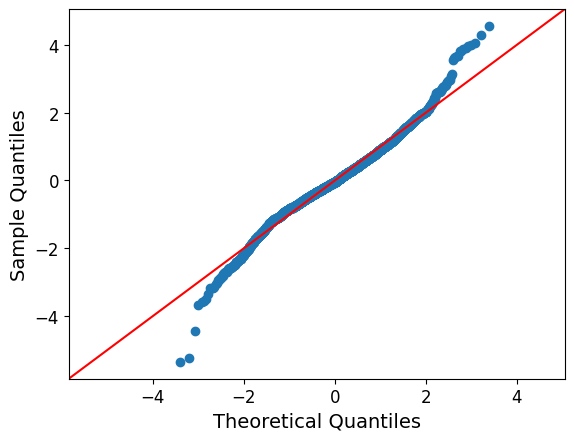

In [69]:
from statsmodels.api import qqplot
qqplot(data=model.resid, fit=True, line="45")
plt.show() 

> As we can see, the model diverts from normal distribution (red line) at lower qunatiles.

> ALthough Homocedasticity and Residuals Normal distribution are not essiential for evaluating the impact of predictors on the target variables, here we use a Robust variance method as a correct for p-values

### Robust variance method to correct p-values

In [70]:
# Set display options for pandas
pd.set_option('display.max_colwidth', None)  # Ensure no truncation of column content
pd.set_option('display.width', 1000)  # Set the width of the display in characters

robust_model = model.get_robustcov_results(cov_type='HC1')
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     767.0
Date:                Mon, 02 Sep 2024   Prob (F-statistic):               0.00
Time:                        08:10:30   Log-Likelihood:                -8201.2
No. Observations:                2938   AIC:                         1.644e+04
Df Residuals:                    2920   BIC:                         1.655e+04
Df Model:                          17                                         
Covariance Type:                  HC1                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

> The Robust ANOVA results returns correcgted p-values. But it also warns us on the possibility of multicollinearity!
> Let's check for multicollinearity test!

In [71]:
# Extract p-values
# Create a DataFrame to make it more readable
p_values_df = pd.DataFrame({
    'Feature': model.pvalues.index, #we get the feature names from the initial model
    'P-Value': robust_model.pvalues #we get the pvalues from robust model
})

In [72]:
p_values_df

,Feature,P-Value
0,Intercept,0.000000e+00
1,C(Status)[T.Developing],1.321372e-04
2,Adult_Mortality_rate,2.144029e-50
3,Infant_deaths_cases,5.968336e-02
4,Alcohol,9.209442e-01
5,Percent_health_expenditure_GDP,1.029649e-08
6,Hepatitis_coverage,9.523880e-02
7,Measles_cases,3.645260e-06
8,BMI,1.606297e-13
9,Polio_coverage,1.798292e-07


In [73]:
#not significant factors
p_values_df[p_values_df["P-Value"]>0.05]

,Feature,P-Value
3,Infant_deaths_cases,0.059683
4,Alcohol,0.920944
6,Hepatitis_coverage,0.095239
14,Thinness_1_19_years,0.054279


In [74]:
#significant facotrs
p_values_df[p_values_df["P-Value"]<=0.05]

,Feature,P-Value
0,Intercept,0.000000e+00
1,C(Status)[T.Developing],1.321372e-04
2,Adult_Mortality_rate,2.144029e-50
5,Percent_health_expenditure_GDP,1.029649e-08
7,Measles_cases,3.645260e-06
8,BMI,1.606297e-13
9,Polio_coverage,1.798292e-07
10,Total_health_expenditure_gov,1.615590e-02
11,Diphtheria_coverage,3.901382e-12
12,HIV_death_cases,2.167854e-69


# 5) ANSWER TO QUESTIONS

### 1 - Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?

In [75]:
#Here is the list of predictors (factors) for Life_Expectancy (assuming p-value = 0.05)
p_values_df[p_values_df["P-Value"]<=0.05]

,Feature,P-Value
0,Intercept,0.000000e+00
1,C(Status)[T.Developing],1.321372e-04
2,Adult_Mortality_rate,2.144029e-50
5,Percent_health_expenditure_GDP,1.029649e-08
7,Measles_cases,3.645260e-06
8,BMI,1.606297e-13
9,Polio_coverage,1.798292e-07
10,Total_health_expenditure_gov,1.615590e-02
11,Diphtheria_coverage,3.901382e-12
12,HIV_death_cases,2.167854e-69


### 2 - Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

It seems that Healthcare_expenditure doesnt have a statistically significant impact on the life_expectancy. So the answer to this question is yes.

### 3 - How does Infant and Adult mortality rates affect life expectancy?

Infant morality doesn't have a significant impact on life_expectancy (seems reasonable) but adult morality impacts life expectancy and looking at the covraince table we can say it decreases life expectancy

### 4 - Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

Surprisingly alcohol consumption doesn't have a statistically significant effect on life expectancy. 
If we consider BMI as measure of body weight index we can say that BMI has a significant impact and increases life expectancy. No other feature is direclty related to lifestyle, eating habits... in the dataset.

### 5 - What is the impact of schooling on the lifespan of humans?

Schooling has a big correlation with Life expectancy and according to ANOVA test it has a significant impact. 
We can say that number of schooling years, increase life expectancy

### 6 - Does Life Expectancy have positive or negative relationship with drinking alcohol?

check question 4

### 8 - What is the impact of Immunization coverage on life Expectancy?

While Hepatits B doesnt seem to have a statistically significant impact on life_expectancy Polio and Diphteria immunization improve life expectancy

### 7 - Do densely populated countries tend to have lower life expectancy?

It is almost the contrary, highly populated countries likes Monaco, Bahrain and Malta have high life expectancy.
From the table in below we can also say that highly populated countries have a higher life expectancy. This maybe the due to a better availability of medical and social services rather than low populated regions we remote areas.

In [76]:
data[['Life_expectancy', 'encoded_density']].groupby("encoded_density").mean()

,Life_expectancy
encoded_density,
0.0,69.040591
1.0,75.231250
20.0,81.341346
8.0,81.475000


The results of our ANOVA tests shows that Population_Denisty_per_km2 has a statistically significant effect on Life expectancy.
We can double check the impact of population density using anothoer ANOVA test, this time using on 'encoded density' / categorical groups

#### group ANOVA test

> Now we can do a ANOVA test to see if there is a significant difference between the groups (different densities)?
> 
> Recall: Null Hypothesis (H0): The population density doesn't impact Life Expectancy!

In [77]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 2.34.4 requires packaging<22.0dev,>=14.3, but you have packaging 24.1 which is incompatible.
jupyterlab 4.2.4 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.2 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
o

In [78]:
import pingouin
pingouin.anova(data=data,
               dv="Life_expectancy",
               between="encoded_density") #p-unc is the p-value

,Source,ddof1,ddof2,F,p-unc,np2
0,encoded_density,3,2934,18.641386,5.621099e-12,0.018704


Here again p-value < 0.05 and therefore we can reject the H0 so population density has an impcat on Life_expectancy